MatPlotLib Challenge by Carter Alvarez

## Observations and Insights 
Capomulin proves to work and decrease tumor volume over time very well
Mouse weight and Average Tumor Volume are positively correlated, as mouse weight increases, so does the average tumor volume, with an R^2 value of .84. 
Capomulin and Ramicane were the most used treatments in the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "inner", on = "Mouse ID")


In [2]:
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_number = combined_df["Mouse ID"].count()
mouse_number

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = combined_df.drop_duplicates("Mouse ID")
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
final_mouse_number  = final_df["Mouse ID"].count()
final_mouse_number

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_chart_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
bar_chart_df= bar_chart_data[["Drug Regimen", "Mouse ID"]]
bar_chart_df = bar_chart_df.set_index("Drug Regimen")


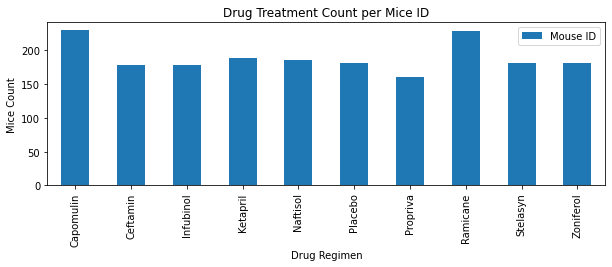

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_chart_df.plot(kind = "bar", figsize = (10,3))

#Display with title 
plt.title("Drug Treatment Count per Mice ID")
plt.ylabel("Mice Count")
plt.show()
plt.tight_layout()

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_plot_list = summary_statistics_df.index.tolist()
drug_plot_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [12]:
#Create a list for the graph
treatment_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
treatment_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [13]:
x_axis = np.arange(len(treatment_count))

Text(0, 0.5, 'Count')

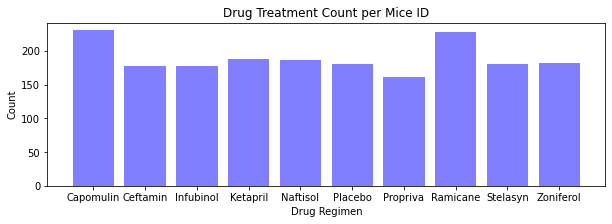

In [14]:
#Assign the Axis 
x_axis = drug_plot_list
#Create the Chart
plt.figure(figsize=(10,3))
plt.bar(x_axis, treatment_count, color='b', alpha = 0.5, align= "center")
plt.title("Drug Treatment Count per Mice ID")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Get the Gender Data
gender_data = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_data


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [16]:
#Get the columns we want 
gender_data = gender_data[["Sex","Mouse ID"]]
gender_data.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

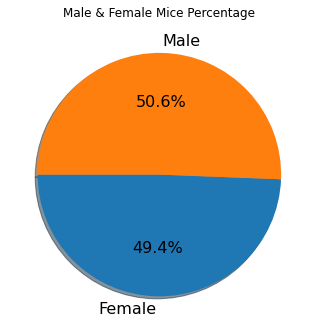

In [17]:
#Create the Pie Graph using pandas
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect = "equal")
gender_data.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct= '%1.1f%%', startangle=180, shadow=True, labels=gender_data["Sex"], legend = False, fontsize=16)

#Titles
plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")



In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_plot


[935, 958]

In [19]:
#Add Style
labels = ["Females", "Males"]
colors = ["green", "yellow"]
explode = (0.1,0)

(-1.1022210380848285,
 1.1046567928362272,
 -1.2101537272442933,
 1.1077121695699783)

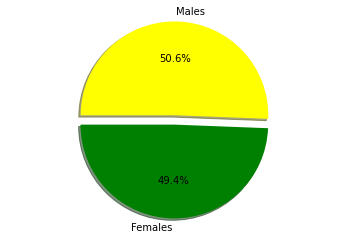

In [20]:
#Create the chart
plt.pie(gender_plot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen = combined_df [(combined_df["Drug Regimen"] == "Capomulin") |
                       (combined_df["Drug Regimen"] == "Ramicane") |
                       (combined_df["Drug Regimen"] == "Infubinol") |
                       (combined_df["Drug Regimen"] == "Ceftamin")]

regimen = regimen[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimen = regimen.groupby(["Mouse ID", "Drug Regimen"])
regimen_df = regimen["Tumor Volume (mm3)"].sum().to_frame()
regimen_plot = regimen_df["Tumor Volume (mm3)"]
regimen_df


,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a275,Ceftamin,527.709651
a411,Ramicane,407.013854
a444,Ramicane,430.600524
...,...,...
y769,Ceftamin,562.908873
y793,Capomulin,385.068292
y865,Ceftamin,549.985586


In [22]:
#Calculate the quartiles
quartiles = regimen_plot.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
inner_quart_range = upper_quartile - lower_quartile


In [23]:
#Display the quartiles 
print(f"The lower quartile is {lower_quartile}")
print(f"The upper quartile is {upper_quartile}")
print(f"The IQR is {inner_quart_range}")


The lower quartile is 340.0010610275
The upper quartile is 449.98455965499994
The IQR is 109.98349862749996


In [24]:
#Calculate the lower and upper bounds to see what outliers would be 
upper_bound = upper_quartile + (1.5*inner_quart_range)
lower_bound = lower_quartile - (1.5*inner_quart_range)


In [25]:
#Print the bounds 
print(f"The upper bound is {upper_bound}")
print(f"The lower bound is {lower_bound}")

The upper bound is 614.9598075962499
The lower bound is 175.02581308625005


In [26]:
#Print analysis
print(f"Values below {lower_bound}, and values above {upper_bound} would be outliers.")

Values below 175.02581308625005, and values above 614.9598075962499 would be outliers.


<function matplotlib.pyplot.show(*args, **kw)>

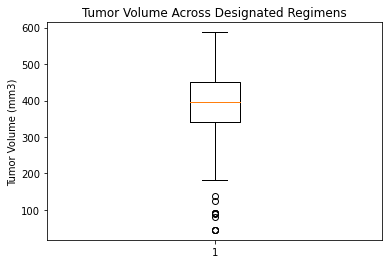

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title("Tumor Volume Across Designated Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(regimen_plot)
plt.show

## Line and Scatter Plots

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = combined_df.loc[combined_df["Drug Regimen"]== "Capomulin"]
capo_df = capo_df.reset_index()
capo_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [29]:
#Look at the data of a Mouse ID
capo_treatment = capo_df.loc[capo_df["Mouse ID"] == "s185"]
                         
capo_treatment

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


In [30]:

#Get the two columns we want to look at for our line 
capo_treatment = capo_treatment.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capo_treatment.head()

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876


Text(0, 0.5, 'Average Tumor Volume (mm3)')

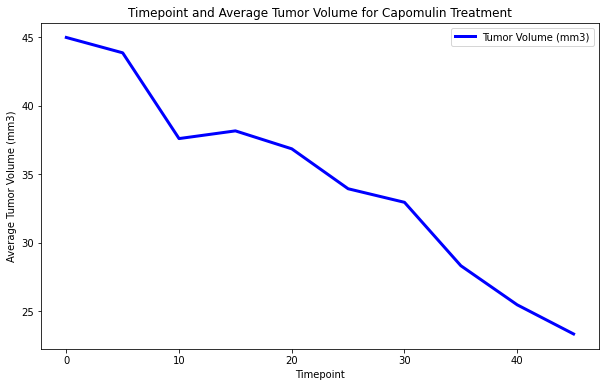

In [31]:
#Create a line graph and reset the index
capo_treatment = capo_treatment.reset_index(drop=True)
capo_treatment.set_index("Timepoint").plot(figsize=(10,6), linewidth = 3, color = "blue")
plt.title("Timepoint and Average Tumor Volume for Capomulin Treatment")
plt.ylabel("Average Tumor Volume (mm3)")



In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Display the capo_df
capo_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [33]:
#Get the columns we want to use for our scatter plot
weight_df = capo_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [34]:
#Calculate average tumor volume for the mouses under the regimen
tumor_avg = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
tumor_avg.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [35]:
#Rename Column 
tumor_avg = tumor_avg.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
tumor_avg.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


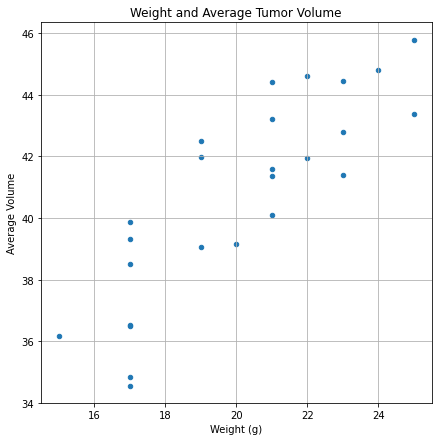

In [36]:
#Create the Scatter Plot
tumor_avg.plot(kind="scatter", x = "Weight (g)", y="Average Volume", grid=True, figsize=(7,7), title = "Weight and Average Tumor Volume")

## Correlation and Regression

In [37]:
tumor_avg.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [38]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = tumor_avg.iloc[:,1]  
avg_tumor_vl = tumor_avg.iloc[:,2]


In [39]:
#Dsiplay the Correlation coefficient
correlation = st.pearsonr(mouse_weight,avg_tumor_vl)
print(f"The correlation between Mouse weight and Average Tumor Volume is {round(correlation[0],2)}")

The correlation between Mouse weight and Average Tumor Volume is 0.84


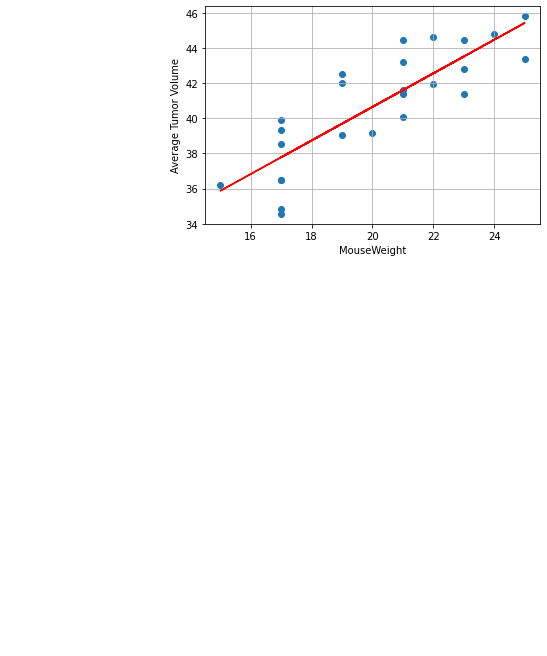

In [40]:
#Create a graph with the regression line added in 
x_values = tumor_avg["Weight (g)"]
y_values = tumor_avg["Average Volume"]
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values, y_values)
x_y_regression = x_values*slope+intercept
line_equation = "y = " +str(round(slope,2)) + "x+ " +str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,x_y_regression,"r-")
plt.annotate(line_equation,(8,10),fontsize=15,color="red")
plt.xlabel("MouseWeight")
plt.ylabel("Average Tumor Volume")
plt.grid(True)
plt.show()